# CS 109A/AC 209A/STAT 121A Data Science: Homework 5 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
import sys
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

**Solutions:**

In [2]:
#Load the data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543, 64)
response array shape: (543,)


Recall from Lab 6 that we're looking for a set of axes onto which we can project our data and get a distinct class separation. If we wanted to project our data onto a small set of predictors, then the question is which small set of predictor should we choose? From the first half of the semester, we solved this problem by doing step-wise variable selection. That is we start with zero predictors, and we add predictors which give us the biggest boost in performance one by one. There are two problems to applying step-wise selection for dimension reduction:

- image arrays are typically high dimensional (a not particularly large image 400 x 400 is already 160,000 dimensional), so even iterating through the entire set of predictors can be costly.


- how do we verify that adding a predictor to our existing set will boost the performance? It's not a trivial thing to check that the classes are "well separated". As some of you suggested in lab, you could run a logistic regression on the projected data for each set of predictors you're trying out, to see which set is the best. But this is **costly**. The whole point of doing dimension reduction before running logistic regression is so that we need only to **regress once on a small set of features**.

So why is PCA a resonable tool for dimension reduction? Recall that one way of looking at PCA is by positing that the data, although high dimensional in appearance, is secretly low dimensional. For example, we might have a set of points in 3D that really all lie on a tilted 2D plane. PCA is a techinque that finds the low-dimensional (hyper) plane that best fits our data, and it allows us to express our data as linear combinations of a small set of features (features that define the best fitting plane).

So why is PCA more preferable than step-wise variable selection? Recall that PCA finds the best fitting (hyper) plane for the data by first **finding the (orthogonal) directions of maximum variation in the data**. These directions are computed as the eigenvectors of the scatter matrix (the covariance matrix) of the data. Now you can ignore the words scatter matrix and eigenvectors and just take away the message that using tools from linear algebra, computing the eigenvectors of a nice matrix is relatively efficient. That is, computing the directions of maximum variation of the data is (relatively) easy. Now, the top $n$ components of PCA represents the best fitting $n$-dimensional plane for the data.

We can try projecting our data onto the top $n$ components of PCA. What's the rationale here? We're hoping that the directions that PCA found not only captures the maximum amount of variance in the data, but that it also separates our classes. But is this always true? I.e. **does the direction that captures maximum variance always capture the maximum amount of class separation?** The answer is, unfortunately, no (see example from Lab 6 slides). However, since step-wise variable selection simply won't work in this case, we are stuck with projecting on to the top PCA components and hoping for the best!

The only question that remains is: what do we pick for $n$? I.e. how many PCA components do we use to project our data? We will solve this problem by trial and error. I.e. we'll pick a number for $n$, project our data, and check to see if we get a good class separation!

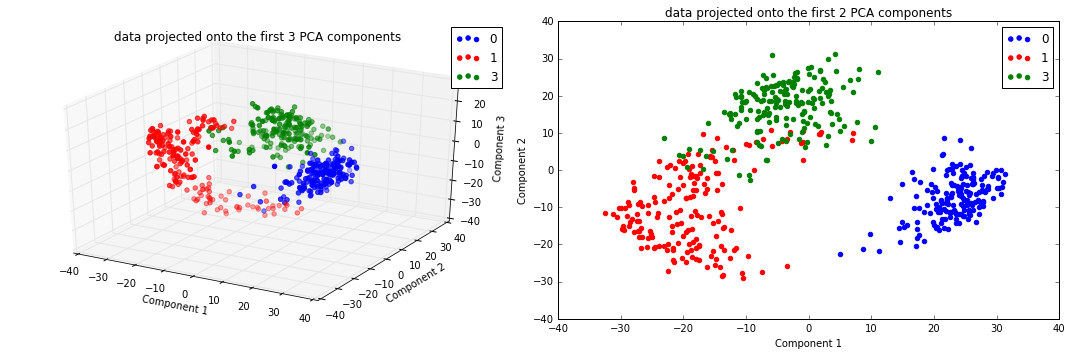

In [3]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

By contruction, the first 2 or 3 components of PCA captures the top 2 or 3 directions of maximum variation. Luckily in our case, the top 2 and 3 components also captures the **separation** in the classes! In fact, we realize that using 2 components of the PCA already separates all three classes! That means we can get away with using just two (linear combinations of) predictors!

**Question:** Recall that the components of PCA are **linear combos of our original predictors**. E.g. component 1 might be 
$$X_1 + 2 X_{10} + 10 X_{63}.$$
But in our case, our predictors are pixels, thus, each PCA component is a combination of different pixels - that is, each PCA component is a digital image! This is good news! It means that the components of the PCA are potentially interpretable.

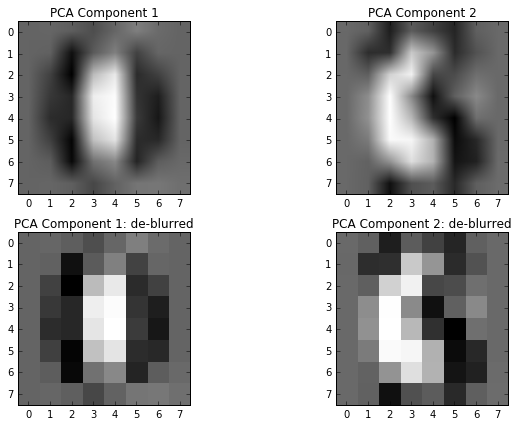

In [4]:
#Display the principal components of PCA as digital images
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# COMPONENT 1
ax[0, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('PCA Component 1')

# COMPONENT 2
ax[0, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('PCA Component 2')

# COMPONENT 1
ax[1, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('PCA Component 1: de-blurred')

# COMPONENT 2
ax[1, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('PCA Component 2: de-blurred')

plt.tight_layout()
plt.show()

The first component looks like the digit 0 and the second resembles the digit 3! So it appears that PCA has constructed a "typical" picture of a 0 for the first component (direction of maximal variation) and it has constructed a "typical" picture of a 3 for the second component. It has expressed every image in our data set as a combination of these two "typical" pictures. That is, say we have an image $I$, PCA expresses $I$ as something like:
$$
I = \text{"typical" 3} + 2* \text{"typical" 0}
$$

Look at our data projected onto the first two components: 

1. nearly all the data points corresponding to 0 are expressed as **a combination of a positive multiple of component 1 and a negative multiple of component 2**;

2. nearly all the data points corresponding to 3 are expressed as **a combination of a negative multiple of component 1 and a positive multiple of component 2**;

3. Nearly all the data points corresponding to the digit 1 is expressed as **a negative combination of the two components**.

**Sanity check:** does this intuitively make sense? Let's visualize how an image of a 1 is represented by the first two PCA components.

The image of 1 is expressed as: -28.25 * component_0 + -13.13 * component_1


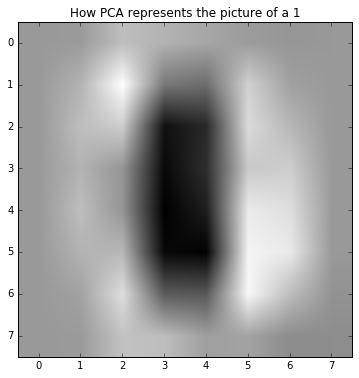

In [5]:
#Get component 0 from PCA
comp_0 = pca.components_[0]
#Get component 1 from PCA
comp_1 = pca.components_[1]

#Get the projected coordinates o the first image of a 1 
image_1 = x_reduced[y == 1][0]

#Express image as a linear combination of the two top PCA components
picture = image_1[0] * comp_0 + image_1[1] * comp_1

print 'The image of 1 is expressed as:', np.round(image_1[0], 2), '* component_0 +', np.round(image_1[1], 2), '* component_1'

#Display the image as a linear combination of the two top PCA components
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.imshow(picture.reshape(8,8), cmap=plt.cm.gray_r)
ax.set_title('How PCA represents the picture of a 1')
plt.show()

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

**Solution:**

We sketched out a very layman's way of solving the multi-class classification problem in Lab 6 (see slides). Essentially, we turn a question about three classes in to three questions, each about just two classes (binary classification). 

In [6]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 3

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg()
logistic_13.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 3

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg()
logistic_03.fit(x_binary, y_binary)

#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_13 = logistic_13.predict(x_reduced)
y_pred_03 = logistic_03.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.935543278085


Is this accuracy meaningful? We've already seen cases where high R^2 values can be deeply misleading. Is an high accuracy rate mean we've learned a good classifier? Shouldn't there be a more intuitive way to assess the quality of our classifiers?

### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

**Solution:**

There many ways to verify the meaningfulness of our metrics (like R^2 and accuracy rate), in this case, since the reduced data is low dimensional, we can visually check the "goodness" of our classifier. I.e. we can plot our data and visualize the decision boundaries (the lines on which logistic regression rely to separate one class from another).

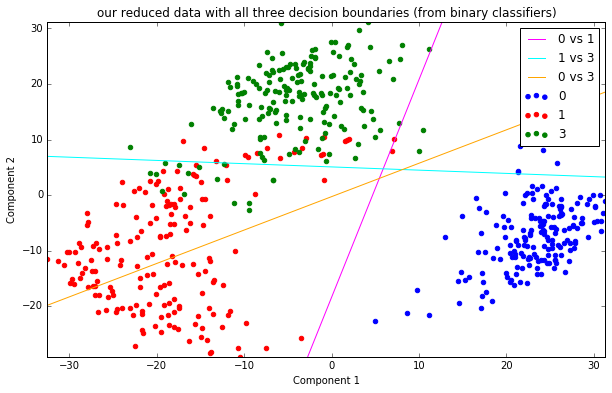

In [7]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced[:, 0])
    x_1 = np.max(x_reduced[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#Scatter plot of our data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='b', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='r', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='g', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced[:,0]), np.max(x_reduced[:,0])])
ax.set_ylim([np.min(x_reduced[:,1]), np.max(x_reduced[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

From the decision surfaces we visualized, we can intuitively see that our binary classifiers are doing a good job of correctly classifying the classes (this supports the high accuracy rate).

We can intuitively see, also, that points lying inside the triangle where the three decision boundaries meet will be hard to classify. In those cases, just by reading the visualization, we can see that the three classes will each receive one vote, resulting in a tie! Luckily, in our data, we see that none of the images fall into that problem zone.

Finally, consider the case where we have 1000 classes. If we continue to use our naive solution to multi-class classification, we will have to train 1000 choose 2 number of classifiers. This is computationally expensive for large number of classes!

An alternate approach to multiclass classification is to use what is called *multinomial logistic regression*. Recall that in binary classification, the class label has a Bernoulli distribution (the distribution of the probability of getting a head or a tail when flipping a coin). That is, probability of $y$ given $x$ is given by
$$
P(y\,|\, x) = Ber\left(y; s(\beta, x)\right)
$$
where $s(\beta, x)$ is the fancy ***sigmoid function*** you saw from class,
$$\frac{e^{\beta_nx_n + \ldots + beta_1 x_1 + \beta_0}}{ 1 + e^{\beta_nx_n + \ldots + beta_1 x_1 + \beta_0}} = \frac{e^{\beta^\top x}}{1 + e^{\beta^\top x}}.$$ 
So then the probability of $y=1$ is 
$$
P(y = 1 \,|\, x) = \frac{e^{\beta^\top x}}{1 + e^{\beta^\top x}}.
$$
The distribution for a random variable with more than one (but still finite) possible outcome is the categorical or multinoulli distribution. This distribution describes the probability of getting a particular face when rolling a die. So, if we have multiple classes, $\{ 1, \ldots, k\}$, then the probability of $y$ given $x$ is given by:
$$
P(y\,|\, x) = Cat\left(y; \sigma(\beta^1,\ldots, \beta^k, x)\right)
$$
where $\sigma(\beta^1,\ldots, \beta^k, x)$ is a function called the ***softmax function***:
$$
\sigma(\beta^1=0,\ldots, \beta^i, \ldots, \beta^k=0, x) = \frac{e^{(\beta^i)^\top x}}{\sum_{j=1}^k e^{(\beta^j)^\top x}}
$$
The softmax function is just like the sigmoid function, but instead of turning one quantity $\beta^\top x$ into a single probability, the softmax turns $k$ number of quantities, $(\beta^1)^\top x, \ldots, (\beta^k)^\top x$, into a probability distribution (i.e. softmax will transform these quantities so that they add up to 1).
Then the probability of $y=i$ is 
$$P(y=i \,|\, x) \,=\, \frac{e^{\beta_i^\top x}}{\sum_{j=1}^k e^{\beta_j^\top x}}.$$ 
In this case, we estimate a membership probability for each class, and predict the class with the highest assigned probability. 

Unlike our naive implementation, where we learn three decision boundaries independently, multinomial logistic regression learn the three decision boundary simultaneously. In terms of computation time, this is much more efficient. Also, with multinomial logistic regression, the ambiguous regions in the input space are much smaller in this case (a point is not classifiable only when the point lies precisely on one of the decision boundaries) - how likely is it that a point is associated to all the classes with **equal probabiliy**?

`sklearn`'s Logistic regression module has options for both the multinomial logistic regression approach as well as a one-vs-all approach. In the one-vs-all approach, one fits a binary classifier between each class and the rest (the other classes combined). The predicted class is the one with the highest assigned probability. If we classify our data using one-vs-all, how would the decision surfaces look (you can intuitively guess without any implementation)? What are some short comings of using one-vs-all classification? Are they the same short comings as our naive approach in the above?

---

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

**Solution:**

Let's start with some data exploration for ourselves, behind the scenes:

In [3]:
#Load the data
df = pd.read_csv('datasets/dataset_2.txt', delimiter=',')
df.head()

,class,text
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...


range of post lengths: 4271 - 114
mean of post lengths: 502.860347323


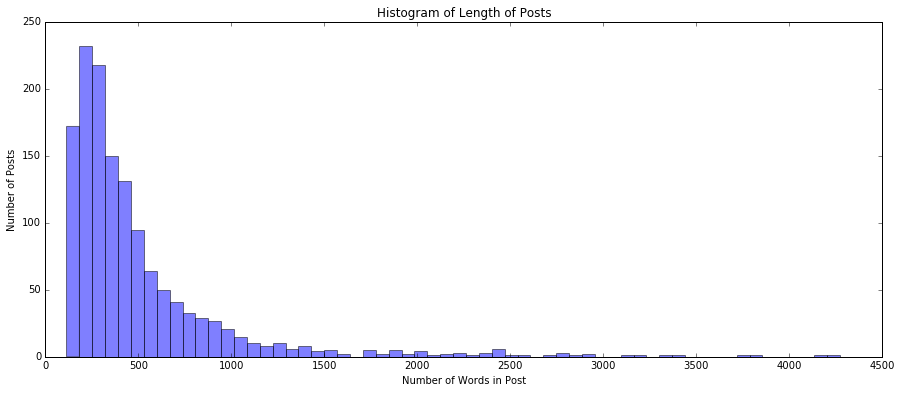

In [4]:
#Break each posts into words and count the number of words
lengths = df['text'].apply(lambda x: len(x.split(' ')))

print 'range of post lengths:', np.max(lengths), '-', np.min(lengths)
print 'mean of post lengths:', np.mean(lengths)

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Histogram of the word counts in each post
ax.hist(lengths, color='blue', bins=60, alpha=0.5)

ax.set_xlabel('Number of Words in Post')
ax.set_ylabel('Number of Posts')
ax.set_title('Histogram of Length of Posts')

plt.show()

It looks like the data is a bunch of text with a label summarizing the sentiment expressed in the text. There are a few problems we need to take care of:

1. We need to convert the text into an array of number (just as we did for digital images);

2. We need to convert the sentiment labels into numbers;

3. Without looking at the entire data set, I can't tell how many sentiments are being expressed. 

From Lab 5, we realize that we can convert text into arrays of numbers by simply dropping all grammatical structure and simply count how many times each word appear in the text. There's a `sklearn` module for doing this! The function we want is `CountVectorizer`.

Now that we know how to convert text into arrays of nubmers, by recording word frequencies, we need to ask: are all words in a text important? Meaning how much does a word like "the" contribute to the feeling of a sentence? Words, like "the", that most people agree do not contribute to the meaning of a text are called "stop words". We want to remove these "stop words" from our text before converting the text into an array. The way to remove stop words is to pass a list of words to the `stop_words` parameter of the `CountVectorizer` function. If we want to remove a predefined set of English stop words (words commonly agreed to be not meaningful), we set the parameter `stop_words` to the string `english`.

In [5]:
#Create a text vectorizer (turns text into array of numbers)
#using a common list of English stop words
vectorizer = CountVectorizer(stop_words='english', min_df=1)

#Get all the text from data
corpus = df['text'].values

#Turn each text into an array of word counts
x = vectorizer.fit_transform(corpus)
x = x.toarray()

#Get the names of all the words we're counting
feature_names = vectorizer.get_feature_names()

print 'data shape:', x.shape
print 'some features:', feature_names[0:10]

data shape: (1382, 16435)
some features: [u'00', u'000', u'0000', u'000k', u'000km', u'000kms', u'00a', u'00p', u'01', u'0110']


To help us get to know our data better let's do a bit of exploring: what are the most frequently appearing words in our data? How many classes are in our data? How many data points are in each class?

In [6]:
#Number of top words
n = 20

#Count the number of time each word occurs in the entire dataset
word_freq = x.sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Print the top n words and their frequencies
print top_words

[(6460, u'car'), (3572, u'ford'), (1976, u'like'), (1734, u'vehicle'), (1585, u'truck'), (1492, u'just'), (1449, u'engine'), (1363, u'br'), (1359, u'good'), (1332, u'drive'), (1278, u'new'), (1224, u'miles'), (1212, u'quot'), (1196, u'seat'), (1160, u'power'), (1094, u'time'), (1078, u'driving'), (1068, u'000'), (1054, u'rear'), (1046, u'seats')]


This way of displaying the top words is hard to read, let's make a bar graph instead.

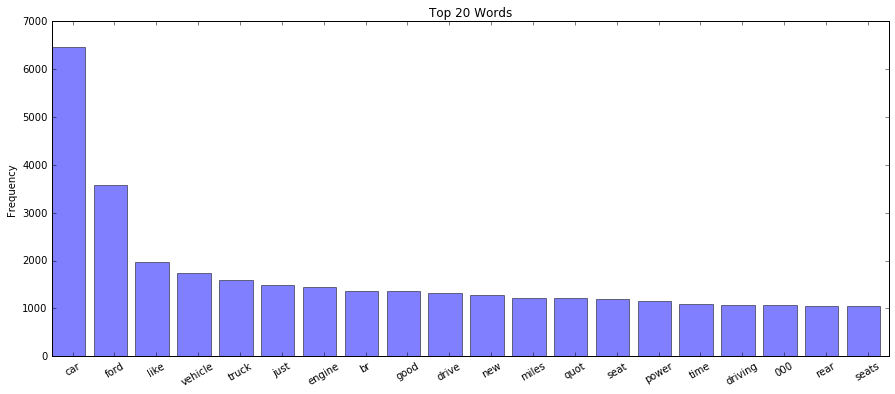

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5
#Bar plot of the frequencies of the top words
ax.bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax.set_ylabel('Frequency')
ax.set_title('Top ' + str(n) + ' Words')

#Label the bars with the top words
ax.set_xticks(indices + width)
ax.set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()

In [11]:
#Encode the class labels (Neg, Pos) as numbers
labels = df['class'].values
enc_label = LabelEncoder()
y = enc_label.fit_transform(labels)

#Print the class labels
print 'classes labels:', enc_label.classes_
#Print the labels for our dataset after encoding them as numbers
print 'transformed labels:', y[:10]

classes labels: ['Neg' 'Pos']
transformed labels: [0 0 0 0 0 0 0 0 0 0]


In [12]:
#Print the number of comments in each class
print 'number of negative posts:', len(y[y == 0])
print 'number of positive posts:', len(y[y == 1])

number of negative posts: 691
number of positive posts: 691


Let's look at the top 20 words in positive and negative posts respectively - perhaps these posts can be distinguished by their most frequently appearing words.

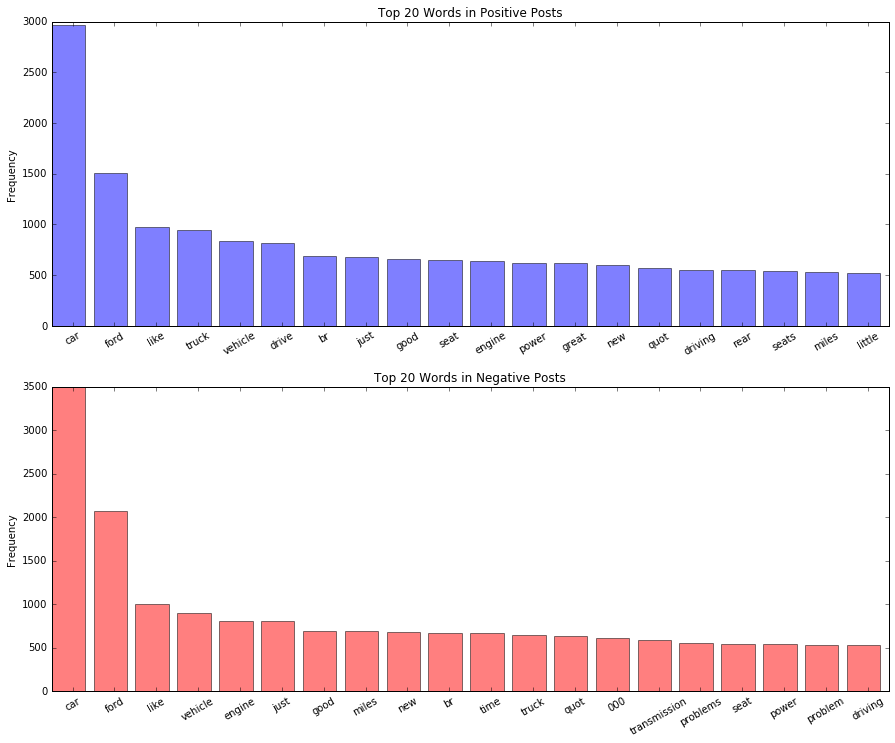

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5

#Count the number of time each word occurs in the positive posts
word_freq = x[y == 1].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[0].bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax[0].set_ylabel('Frequency')
ax[0].set_title('Top ' + str(n) + ' Words in Positive Posts')

#Label the bars with the top words
ax[0].set_xticks(indices + width)
ax[0].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[0].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in the positive posts
word_freq = x[y == 0].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[1].bar(indices, [word[0] for word in top_words], color='red', alpha=0.5)

ax[1].set_ylabel('Frequency')
ax[1].set_title('Top ' + str(n) + ' Words in Negative Posts')

#Label the bars with the top words
ax[1].set_xticks(indices + width)
ax[1].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[1].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()

Unfortunately, the top 20 words in the negative and positive posts have a great deal of overlap, it's not clear that negative posts uses an entire different set of vocabulary than positive posts. One thing you might try is to remove the top 20 most frequently occurring words in the entire dataset from each post, in the hopes that the words remaining in each posts will be the relative unique words that distinguishes a postive post from a negative one. We do not implement this solution here, but we highly encourage you to do so!


Now that we have some idea of what our data looks like and we've transformed our data into numerical representation, we can now perform classification - using the word counts for each post to determine whether the post is positive or negative.

In [18]:
# Train/test split
n_samples = len(x)
train_indices = np.random.uniform(size=n_samples) > 1. / 3.  #Select two thirds for train

x_train = x[train_indices]
y_train = y[train_indices]

x_test = x[~train_indices]
y_test = y[~train_indices]

#Generate array of L2 regularization parameters
regularization = 10.**np.arange(-10, 5)

#Fit logistic model with cross validation to select the optimal regularization parameter
logistic = LogRegCV(cv=5, 
                    penalty='l2', 
                    Cs=regularization, 
                    solver='liblinear', 
                    n_jobs=4)
logistic.fit(x_train, y_train)

#Print results
print 'Accuracy on overall test set:', logistic.score(x_test, y_test)
print 'Accuracy on class 0 in test set:', logistic.score(x_test[y_test == 0], y_test[y_test == 0])
print 'Accuracy on class 1 in test set:', logistic.score(x_test[y_test == 1], y_test[y_test == 1])

Accuracy on overall test set: 0.781385281385
Accuracy on class 0 in test set: 0.763392857143
Accuracy on class 1 in test set: 0.798319327731


Our accuracy is pretty good, and it tooks like we do equally well on predicting negative posts and predicting positive posts. 

**Question:** Is this the best we can do? What model choices can we revisit to improve our accuracy? Well, looking at our bar graph of top words, it appears that words like "car", "ford" and "vehical" show up with the highest frequency. But do these words indicate sentiment (feeling)? 

Let's check what happens when we remove words that occur with high frequency in each post: that is we set a threshhold, `max_df`, and remove words from posts that occur more that `max_df` number of times. We'll play around with a couple of choices for `max_df` and see if it improves our prediction.

In [23]:
#This function computes the accuracy of logistic regression given cut-offs, min_df, max_df
def vectorize_classify(min_df, max_df, trials, x, y):
    #Create a text vectorizer, removing words with frequency less than min_df or
    #greater than max_df
    vectorizer = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df)
    #Transform our text into arrays of numbers
    corpus = df['text'].values
    x = vectorizer.fit_transform(corpus)
    x = x.toarray()
    
    #Record overall accuracy rate, accuracy on class 1 and class 0
    overall_acc = []
    class_1_acc = []
    class_0_acc = []
    
    
    n_samples = len(x)
    
    #Perform logistic regression on a handful of train/test splits
    for i in range(trials):
        #Print progress
        sys.stdout.write("\r{0}% completed".format((float(i + 1)/trials)*100))
        sys.stdout.flush()
        
        # Train/test split
        train_indices = np.random.uniform(size=n_samples) > 1. / 3.  #Select two thirds for train

        x_train = x[train_indices]
        y_train = y[train_indices]

        x_test = x[~train_indices]
        y_test = y[~train_indices]

        #Generate array of L2 regularization parameters
        regularization = 10. ** np.arange(-10, 5)

        #Fit logistic model
        logistic = LogRegCV(cv=5, 
                            penalty='l2', 
                            Cs=regularization, 
                            solver='liblinear', 
                            n_jobs=4)
        logistic.fit(x_train, y_train)
        
        overall_acc.append(logistic.score(x_test, y_test))
        class_0_acc.append(logistic.score(x_test[y_test == 0], y_test[y_test == 0]))
        class_1_acc.append(logistic.score(x_test[y_test == 1], y_test[y_test == 1]))

    return (np.mean(overall_acc), 
            np.mean(class_0_acc),
            np.mean(class_1_acc))

In [41]:
min_df = 1
max_df = 6000
trials = 10
overall, class_0, class_1 = vectorize_classify(min_df, max_df, trials, x, y)
print '\nMin frequency, max frequency:', min_df, ',', max_df
print 'Accuracy on overall test set:', overall
print 'Accuracy on class 0 in test set:', class_0
print 'Accuracy on class 1 in test set:', class_1

100.0% completed
Min frequency, max frequency: 1 , 6000
Accuracy on overall test set: 0.784172702273
Accuracy on class 0 in test set: 0.765166605459
Accuracy on class 1 in test set: 0.804901047514


In [43]:
min_df = 1
max_df = 50
trials = 10
overall, class_0, class_1 = vectorize_classify(min_df, max_df, trials, x, y)
print '\nMin frequency, max frequency:', min_df, ',', max_df
print 'Accuracy on overall test set:', overall
print 'Accuracy on class 0 in test set:', class_0
print 'Accuracy on class 1 in test set:', class_1

100.0% completed
Min frequency, max frequency: 1 , 50
Accuracy on overall test set: 0.72745433859
Accuracy on class 0 in test set: 0.731472023882
Accuracy on class 1 in test set: 0.725347610612


Well it looks like naively setting `max_df` to be 50 doesn't improve accuracy. You are welcome to play with more value of `max_df`, but note that each computation above takes over a minute to complete so trying a large range of values for `max_df` using our implementation may not be practical!

### Report

The dataset we're given consists of 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. Our task is to build a model that can predict the sentiment expressed given the text of a new post.

The average post in our dataset is 503 words in length, the shortest post is 114 word and the longest is 4271 words. From the histogram of the lengths of the posts, we see that most posts are around 500 words or below. Longer posts are relatively rare. The words appearing in the data with the high frequency are words for car (car and vehicle), a particular brand of car (Ford), and car parts (engine, seats etc). Top 20 frequently appearing words have frequency in the thousands. There are equal number of posts expressing each sentiment.

Our primary challenge in working with this dataset is that it is textual rather than numerical, whereas traditional models for classifcation and prediction require the input to be numerical. Our solution is to trasform each post into an array (or row) of numbers, where each number represents the count of a particular word that appears in the post. The challenge here, of course, is that if we represent each unique vocabulary as one position in this array, we will end up with an extremely long array. To get around this problem, we first remove a set of words that we consider to be non-meaningful (stop words) from each posts. Stop words include words with purely grammatical function, such as "a", "the", "and" etc.

After converting our posts into numerical arrays, we trained a logistic regression model using our data. Simply speaking, a logistic regression model learns a plane in the (feature) space of the data that best separates the two classes. That is, most of the negative posts should lie on one side of the plane while the positive posts should lie on the other. Given a new post, we check to see on which side of the plane the post lie and classify it as positive or negative based on its position. 

To assess the quality of our model, we split the data into a training set and a testing set, we define our model on the training set and use the testing set to test the accuracy of our predictions. Our results indicate that our model's overall accuracy is 78%, the accuracy of predicting negative posts is 77% and the accuracy of predicting positive posts is 80%. I.e. our model does equally well on predicting both sentiments. 

Finally, we tested the sensitivity of model to the list of stop words removed from the posts. We find that if we naively remove commonly occuring words like car and vehicle from the posts, this decrease the predictive accuracy of our model. This indicates that the accuracy of model is sensitive to the set of stop words, and hence this relationship calls for future exploration.

**DISCLAIMER:** There is a lot of room in this problem for creativity! In the solutions, we provide basic answers to these problems. We fully expect your solutions to be more interesting than ours - we simply cannot cover every interesting analysis you could have performed here! For example, many of you tried dimension reduction techniques to get rid of the huge number of words in the data, some of you tried to get rid of non-emotional words (by downloading an "emotional words" database), some of you tried to analyze which words are most strongly associated to which feeling, etc - these are all fantastic ideas, which we will not demonstrate in the solutions!

---

## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\hat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\hat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about the classifier if it uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.

**Solution:**

Let's read in the data and do some basic exploration:

In [3]:
# Load Data 
data_train = np.loadtxt("datasets/dataset_3_train.txt", delimiter=',')
data_test1 = np.loadtxt("datasets/dataset_3_test_1.txt", delimiter=',')
data_test2 = np.loadtxt("datasets/dataset_3_test_2.txt", delimiter=',')

# Split into train, test sets, for test sets 1 & 2
x_train = data_train[:, :-1]
y_train = data_train[:, -1]

x_test1 = data_test1[:, :-1]
y_test1 = data_test1[:, -1]

x_test2 = data_test2[:, :-1]
y_test2 = data_test2[:, -1]

# Print proportion of class 1 in our train/test sets
print'Proportion of class 1 in train set:', y_train.mean()
print'Proportion of class 1 in test set 1:', y_test1.mean()
print'Proportion of class 1 in test set 2:', y_test2.mean()

Proportion of class 1 in train set: 0.0512820512821
Proportion of class 1 in test set 1: 0.0597014925373
Proportion of class 1 in test set 2: 0.5


The proportion of class 1 in the training set is tiny! That is, the training set consists overwhelmingly of class 0! What effect will this have on our classifier?

In [4]:
# Fit logistic regression
logistic = LogReg()
logistic.fit(x_train, y_train)

# Evaluate model on train and both test sets
print '\nLogistic regression'
print 'Train set:\n\t overall accuracy:', logistic.score(x_train, y_train),\
        '\n\t accuracy on class 0:', logistic.score(x_train[y_train==0, :], y_train[y_train==0]),\
        '\n\t accuracy on class 1:', logistic.score(x_train[y_train==1, :], y_train[y_train==1])
print 'Test set 1:\n\t overall accuracy:', logistic.score(x_test1, y_test1),\
        '\n\t accuracy on class 0:', logistic.score(x_test1[y_test1==0, :], y_test1[y_test1==0]),\
        '\n\t accuracy on class 1:', logistic.score(x_test1[y_test1==1, :], y_test1[y_test1==1])
print 'Test set 2:\n\t overall accuracy:', logistic.score(x_test2, y_test2),\
        '\n\t accuracy on class 0:', logistic.score(x_test2[y_test2==0, :], y_test2[y_test2==0]),\
        '\n\t accuracy on class 1:', logistic.score(x_test2[y_test2==1, :], y_test2[y_test2==1])


Logistic regression
Train set:
	 overall accuracy: 0.948717948718 
	 accuracy on class 0: 1.0 
	 accuracy on class 1: 0.0
Test set 1:
	 overall accuracy: 0.940298507463 
	 accuracy on class 0: 1.0 
	 accuracy on class 1: 0.0
Test set 2:
	 overall accuracy: 0.5 
	 accuracy on class 0: 1.0 
	 accuracy on class 1: 0.0


From the above, we see that because there are so few instances of class 1 in our training set, our logistic regression model effectively ignores these data points - it overspecializes to learning how to classify class 0. 

As a result, when the testing set contains very few instances of class 1, as in the case of test set 1, our classifier performs extremely well overall by accurately classifying class 0. When the testing set contains very large number of instances of class 1, as in the case of test set 2, our classifier still does very well recognizeing class 0, but it does very poorly on recognizing class 1; hence our overall accuracy decreases. 

This illustrates that overall accuracy rates can be extremely misleading when our classes are unbalanced in size!

Furthermore, recall that in this application we are interested in identifying patients with heart disease (class 1). Thus, for us, it is much more crucial that we recognize class 1 rather than class 0. Class 0, representing healthy patients, although numerous, is in fact the class of lesser clinical signifiance!

In the below, for comparison, we compute the accuracy of a silly classifier that always classifies a patient as class 0.

In [18]:
# Evaluate the accuracy of a classifier that predicts 
print 'Silly Classifier that classifies every thing as class 0'
print 'Train overall accuracy:', np.mean(y_train == 0)
print 'Test 1 overall accuracy:', np.mean(y_test1 == 0)
print 'Test 2 overall accuracy:', np.mean(y_test2 == 0)

Silly Classifier that classifies every thing as class 0
Train overall accuracy: 0.948717948718
Test 1 overall accuracy: 0.940298507463
Test 2 overall accuracy: 0.5


The silly classifier does just as well as our logistic regression classifier!

Will changing the threshold for logistic regression make a difference? Changing the threshold means that if $P(y=1 | x)$ is low, less than 0.5, we might still want to label the point x as class 1. That is, we are lowering our standards for which points we accept as class 1. Will this help?

In [5]:
#--------  thresholded_accuracy
# A function to evaluate accuracy of LogReg model with threshold 't'
# Input: 
#      model (LogReg model)
#      t (threshold)
#      x (n x d array of predictors)
#      y (n x 1 array of binary response variable vals)
def thresholded_accuracy(model, t, x, y):
    # Get the class probabilities rather than class predictions from log reg
    y_prob = model.predict_proba(x)[:, 1]
    # Make the class predictions based on threshold
    y_pred = np.zeros((x.shape[0], 1)).reshape(-1, )
    # If P(y=1|x) > threshold t then we set the label to 1: y = 1
    y_pred[y_prob > t] = 1
    # Compute accuracy of our predictions
    accuracy = np.mean(y_pred == y)

    return accuracy

In [6]:
# Logistic regression with different threshold
print '\nThresholded logistic regression'

# Fit logistic regression
logistic = LogReg()
logistic.fit(x_train, y_train)

# Use thresholded_accuracy to do class prediction
print 'Train set:\n\t total accuracy:', thresholded_accuracy(logistic, 0.05, x_train, y_train),\
        '\n\t accuracy on class 0:', thresholded_accuracy(logistic, 0.05, x_train[y_train==0, :], \
                                                          y_train[y_train==0]),\
        '\n\t accuracy on class 1:', thresholded_accuracy(logistic, 0.05, x_train[y_train==1, :], \
                                                          y_train[y_train==1])
print 'Test set 1:\n\t total accuracy:', thresholded_accuracy(logistic, 0.05, x_test1, y_test1),\
        '\n\t accuracy on class 0:', thresholded_accuracy(logistic, 0.05, x_test1[y_test1==0, :], \
                                                          y_test1[y_test1==0]),\
        '\n\t accuracy on class 1:', thresholded_accuracy(logistic, 0.05, x_test1[y_test1==1, :], \
                                                          y_test1[y_test1==1])
print 'Test set 2:\n\t total accuracy:', thresholded_accuracy(logistic, 0.05, x_test2, y_test2),\
        '\n\t accuracy on class 0:', thresholded_accuracy(logistic, 0.05, x_test2[y_test2==0, :], \
                                                          y_test2[y_test2==0]),\
        '\n\t accuracy on class 1:', thresholded_accuracy(logistic, 0.05, x_test2[y_test2==1, :], \
                                                          y_test2[y_test2==1])


Thresholded logistic regression
Train set:
	 total accuracy: 0.576923076923 
	 accuracy on class 0: 0.581081081081 
	 accuracy on class 1: 0.5
Test set 1:
	 total accuracy: 0.582089552239 
	 accuracy on class 0: 0.603174603175 
	 accuracy on class 1: 0.25
Test set 2:
	 total accuracy: 0.553191489362 
	 accuracy on class 0: 0.574468085106 
	 accuracy on class 1: 0.531914893617


By changing the threshold for labeling a data point as class 1 (we label x as class 1 if $P(y=1 | x) > 0.05$), we see that we have decreased the overall accuracy of our classifying on the training set and both test sets. Zooming in, we see that this decrease is due to the fact that we are miss-classifying class 0 at a higher rate, this is due to the fact that we are now labling some class 0 data points as class 1! The good new, however, is that we have drastically improved our accuracy on the rare class, class 1: from 0 to 25% and 53% on the two tests sets (respectively). 

Is this trade-off in accuracy on the two classes acceptable? With our lower-threshold classifier, we are frequently classifying healthy patients as potential heart disease patients, but we are also catching genuine instances of heart disease at a much higher rate. The answer to "which classifier is better" in this case cannot made be through mathematics but must require some domain knowledge. Meaning, you must answer, as a medical professional, whether it's better to falsely classify healthy patients as unhealthy or to completely miss serious cases of heart disease.

**DISCLAIMER:** You are not required to talk about specificity, sensitivity, false positive or false negatives in your analysis, as this lecture happened after Homework 5 was assigned. But many of you found it helpful to use these concepts in your analysis. 

In the following, we compute the confusion matrix for each of our classifier and summarize our findings again in terms of this new language.

**Test Set #1:**

In [15]:
# Make the class predictions
y_pred = logistic.predict(x_test1)
# Create confusion matrix from true class labels and predicted class labels
conf_mat = confusion_matrix(y_test1, y_pred)
# Create dataframe from confusion matrix
conf_df = pd.DataFrame(conf_mat, columns=['y_hat=0', 'y_hat=1'], index=['y=0', 'y=1'])
conf_df

,y_hat=0,y_hat=1
y=0,63,0
y=1,4,0


For regular logistic regression, we can summarize its performance on test set #1 as follows:

1. sensitivity of our classifier ($p(\hat{y} = 1 \,|\, y = 1)$): $0/4 = 0\%$
2. specificity of our classifier ($p(\hat{y} = 0 \,|\, y = 0)$): $63/63 = 100\%$
3. positive predictive value or precision of our classifier ($p(y = 1 \,|\, \hat{y} = 1)$): N/A
4. negative predictive value of our classifier ($p(y = 0 \,|\, \hat{y} = 0)$): $63/67 \approx 94\%$
5. false positive rate ($p(\hat{y} = 1 \,|\, y = 0)$): $0/63 \approx 0\%$
6. false negative rate ($p(\hat{y} = 0 \,|\, y = 1)$): $4/4 = 100\%$

From our analysis above, the three numbers that are most misleading for measuring the quality of our classifier are: the specificity, the false positive rate and the negative predictive value. Again, since class 1 (heart disease patients) are rare in the general population, we can always keep those numbers artificially inflated by over estimating the healthy individuals in the population.

In [12]:
# Get the class probabilities rather than class predictions from log reg
y_prob = logistic.predict_proba(x_test1)[:, 1]
# Make the class predictions based on threshold
y_pred = np.zeros((x_test1.shape[0], 1)).reshape(-1,)
# If P(y=1|x) > threshold t then we set the label to 1: y = 1
y_pred[y_prob > 0.05] = 1

# Create confusion matrix from true class labels and predicted class labels
conf_mat = confusion_matrix(y_test1, y_pred)
# Create dataframe from confusion matrix
conf_df = pd.DataFrame(conf_mat, columns=['y_hat=0', 'y_hat=1'], index=['y=0', 'y=1'])
conf_df

,y_hat=0,y_hat=1
y=0,38,25
y=1,3,1


For our modified threshold classifier, we can summarize its performance on test set #1 as follows:

1. sensitivity of our classifier ($p(\hat{y} = 1 \,|\, y = 1)$): $1/4 = 25\%$
2. specificity of our classifier ($p(\hat{y} = 0 \,|\, y = 0)$): $38/63 \approx 60\%$
3. positive predictive value or precision of our classifier ($p(y = 1 \,|\, \hat{y} = 1)$): $1/26 \approx 4\%$
4. negative predictive value of our classifier ($p(y = 0 \,|\, \hat{y} = 0)$): $38/41 \approx 93\%$
5. false positive rate ($p(\hat{y} = 1 \,|\, y = 0)$): $25/63 \approx 40\%$
6. false negative rate ($p(\hat{y} = 0 \,|\, y = 1)$): $3/4 = 75\%$

We see that, by lowering the threshold from 0.5 to 0.05, we've increase the sensitivity of our classifier to class 1 (heart-disease patients), increasing it from 0% to 25%. In doing so, we've compromised our false positive rate, which jumped from 0% to 40% (or, equivalently, our specificity, which droped from 100% to 60%). The precision (or positive predictive value) of our test is low, only 4% of the patients we flag as having heart disease actually have the disease. This implies that all patients who are classified as "heart disease" **must** be given further tests before we can confidently make a final diagnosis. 

(You can perform the same analysis for these two classifiers on the second test set)

Finally, **what on earth is the loss function corresponding to our lower-threshold classifier**? Meaning, what notion of error or loss is our second classifier trying to minimize? We make the following claim:

A classifier that predicts 1 when $\hat{P}(Y = 1 \,|\, X) \geq c$ and 0 otherwise, is the optimal classifier for the following weighted classification loss:
$$
\frac{1}{n}\sum_{i=1}^n c\,I(y_i = 0, \hat{y}_i = 1) \,+\, (1-c)\,I(y_i = 1, \hat{y}_i = 0),
$$
where $c \in [0,1]$ is the cost for mis-predicting class 0 as class 1, and $1-c$ is the cost of mis-predicting class 1 as class 0.

That is, **lowering the threshold of the classifier is equivalent to increasing the penalty on mis-predicting class 1 as class 0 (a false negative prediction)**. Under this light, we see that we should lower the threshold when we want to heavily penalize false negatives and raise the threshold when we want to heavily penalize false positives.

**Proof:**

For a given $X$, and classifier $h$, the probability of mis-predicting class 1 as class 0:

$$P(Y = 1 \,|\, X)\,I(h(X) = 0),$$ 

and the probability of mis-predicting class 0 as class 1: 

$$P(Y = 0 \,|\, x)\,I(h(X) = 1) \,\,=\,\, (1 \,-\, P(Y = 1 \,|\, X))\,I(h(X) = q).$$ 

Thus the weighted classification loss on $X$ is given by

$$c\,(1 \,-\, P(Y = 1 \,|\, X))\,I(h(X) = 1) \,+\, (1-c)\,P(Y = 1 \,|\, X)\,I(h(X) = 0).$$


The above loss is minimized if $h$ predicts 1 whenever
$$c\,(1 \,-\, P(Y = 1 \,|\, X)) \,\leq\, (1-c)\,P(Y = 1 \,|\, X)$$
i.e.
$$P(Y = 1 \,|\, X) \,\geq\, c,$$
and $h$ predicts 0 whenever
$$(1-c)\,P(Y = 1 \,|\, X) \,<\, c\,(1 \,-\, P(Y = 1 \,|\, X)) $$
i.e.
$$P(Y = 1 \,|\, X) \,<\, c,$$


Thus if $\hat{P}(Y=1\,|\,X)$ is the estimated conditional probability, the optimal classifier for the weighted classification loss predicts 1 when $\hat{P}(Y = 1 \,|\, X) \geq c$ and 0 otherwise.